# INTRODUCTION

As the energy sector shifts toward renewables, smart grids are revolutionizing how we manage power. But with this innovation comes complexity, especially in maintaining grid stability. Traditional models often fall short in capturing the dynamic, real-time challenges of modern grids.

This project harnesses the power of deep learning to predict grid stability with greater accuracy and efficiency. By simulating real-world scenarios, we aim to provide grid operators with smarter, faster insights, ensuring reliable energy flow in an increasingly renewable-driven world. This is a step toward a more resilient and sustainable energy future.

# PROBLEM STATEMNENT AND OBJECTIVE

The rise of renewable energy and the shift towards decentralized energy production has introduced new challenges in managing smart grid stability. Traditional methods, such as the Decentral Smart Grid Control (DSGC) model, rely on mathematical simplifications that fail to capture the dynamic complexity of real-world smart grids. These models struggle to predict grid instabilities caused by fluctuations in energy production and consumption, particularly in systems with multiple energy prosumers. A more flexible, data-driven approach is needed to predict grid stability more accurately and in real-time.

**Objectives:**

- Leverage deep learning to predict smart grid stability more accurately than traditional methods.
- Explore various neural network architectures to optimize performance in the binary classification task (stable vs. unstable).
- Assess the impact of hyperparameters (number of hidden layers, epochs, and feature scaling) on model accuracy.
- Provide practical insights into how deep learning models can enhance grid management and stability in real-world scenarios.

# BACKGROUND AND LITERATURE REVIEW

Previous research has explored different approaches to predicting smart grid stability. The DSGC model, discussed in works by B. Schäfer and V. Arzamasov, provides a theoretical framework for stability prediction by modeling grid frequency as a key indicator of grid balance. While effective in controlled scenarios, the DSGC model relies on fixed input values and simplifications that limit its applicability in more complex and dynamic environments.

Recent studies, like those from Arzamasov et al., have begun integrating machine learning techniques, particularly decision trees (CART), to address some of these limitations. However, deep learning remains largely unexplored in this domain. By applying advanced neural network architectures, this project seeks to push the boundaries of grid stability prediction, building on previous work while introducing more sophisticated and adaptive models.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d pcbreviglieri/smart-grid-stability

Dataset URL: https://www.kaggle.com/datasets/pcbreviglieri/smart-grid-stability
License(s): copyright-authors
  0% 0.00/6.30M [00:00<?, ?B/s]
100% 6.30M/6.30M [00:00<00:00, 74.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/smart-grid-stability.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
data = pd.read_csv('/content/smart_grid_stability_augmented.csv')

In [6]:
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

### Dataset and Features

**Dataset Description**
This project uses the "Electrical Grid Stability Simulated Dataset," which simulates a 4-node star network comprising one energy supplier and three consumers. The dataset consists of 60,000 observations after augmentation (originally 10,000). Each observation contains 12 predictive features related to the grid's dynamic behavior and two dependent variables, including a binary label for grid stability (stable or unstable).

**Feature Description**

- **Reaction times (τ1 to τ4):** Represent the response times of each network participant to changes in energy pricing.
- **Nominal power produced or consumed (p1 to p4):** Measure energy production (positive values) and consumption (negative values). The balance between total energy produced and consumed is critical for stability.
- **Price elasticity coefficients (g1 to g4):** Reflect how participants' energy consumption or production behavior changes in response to price fluctuations.

The dependent variable 'stabf' is a binary label representing grid stability (1 = stable, 0 = unstable). This label will be the target for the classification models

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [8]:
data.describe().T

count      mean       std       min       25%       50%       75%  \
tau1  60000.0  5.250000  2.742434  0.500793  2.874892  5.250004  7.624690   
tau2  60000.0  5.250001  2.742437  0.500141  2.875011  5.249981  7.624896   
tau3  60000.0  5.250001  2.742437  0.500141  2.875011  5.249981  7.624896   
tau4  60000.0  5.250001  2.742437  0.500141  2.875011  5.249981  7.624896   
p1    60000.0  3.750000  0.752129  1.582590  3.218300  3.751025  4.282420   
p2    60000.0 -1.250000  0.433017 -1.999945 -1.624997 -1.249996 -0.874993   
p3    60000.0 -1.250000  0.433017 -1.999945 -1.624997 -1.249996 -0.874993   
p4    60000.0 -1.250000  0.433017 -1.999945 -1.624997 -1.249996 -0.874993   
g1    60000.0  0.525000  0.274244  0.050009  0.287521  0.525009  0.762435   
g2    60000.0  0.525000  0.274243  0.050028  0.287497  0.525007  0.762490   
g3    60000.0  0.525000  0.274243  0.050028  0.287497  0.525007  0.762490   
g4    60000.0  0.525000  0.274243  0.050028  0.287497  0.525007  0.762490   
stab  60000.0  0.015731  0.036917 -0.080760 -0.015557  0.017142  0.044878   

           max  
tau1  9.999469  
tau2  9.999837  
tau3  9.999837  
tau4  9.999837  
p1    5.864418  
p2   -0.500025  
p3   -0.500025  
p4   -0.500025  
g1    0.999937  
g2    0.999982  
g3    0.999982  
g4    0.999982  
stab  0.109403

In [9]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  5.395242  6.758894  2.525003  1.850311  3.513715 -0.847552 -1.648734   
1  6.620098  1.602905  8.616347  3.391141  4.210612 -1.397320 -1.093337   
2  3.441294  3.194950  8.897378  4.052846  3.879996 -0.940282 -1.500366   
3  2.136294  1.273276  2.614373  3.785228  3.628125 -1.241760 -0.973223   
4  7.940691  2.047957  2.544935  4.374240  3.454680 -0.596267 -1.665852   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.017430  0.902786  0.451621  0.741819  0.684521  0.036920  unstable  
1 -1.719955  0.564029  0.265844  0.616598  0.796080  0.025449  unstable  
2 -1.439348  0.941481  0.619960  0.430016  0.886050  0.054770  unstable  
3 -1.413142  0.272197  0.540088  0.675964  0.540205 -0.029410    stable  
4 -1.192560  0.743399  0.236855  0.401875  0.915031  0.026285  unstable

## EXPLORATORY DATA ANALYSIS

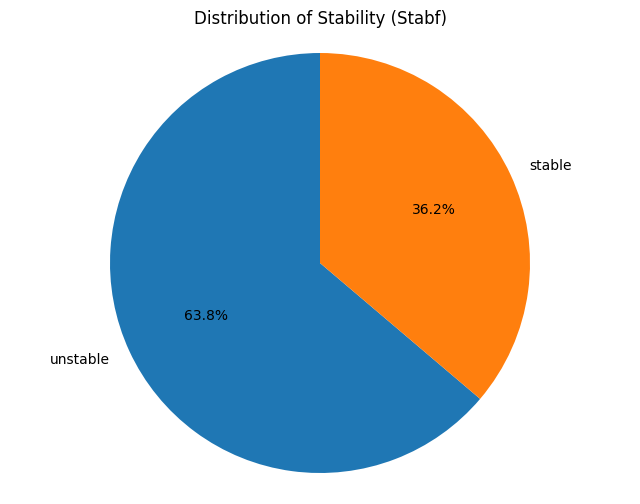

In [10]:
stabf_counts = data['stabf'].value_counts()

plt.figure(figsize = (8,6))
plt.pie(stabf_counts, labels = stabf_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Stability (Stabf)')
plt.axis('equal')
plt.show()

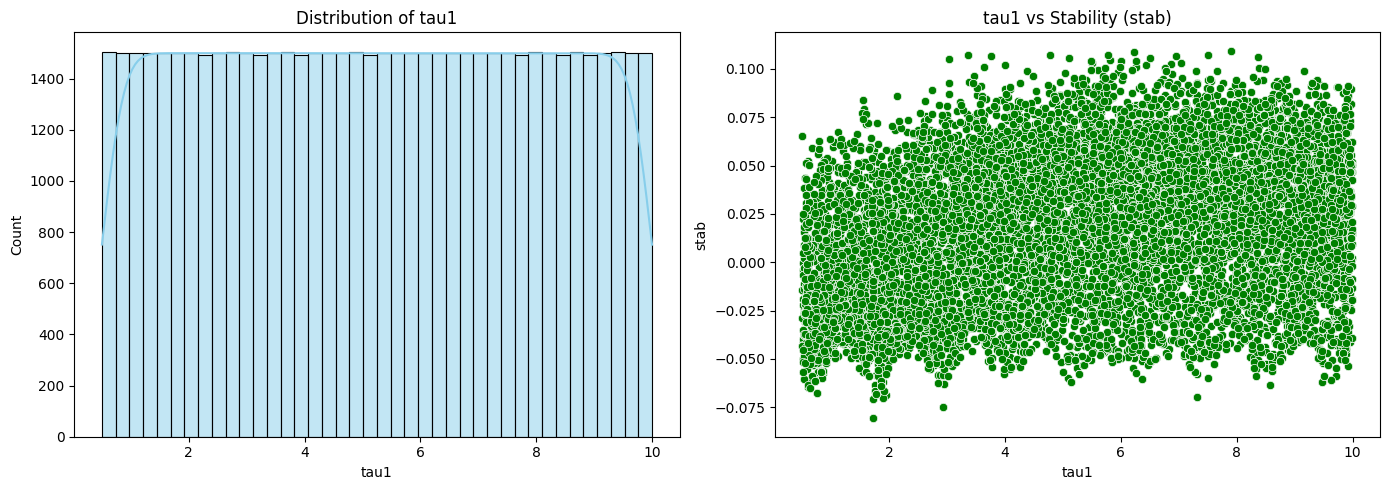

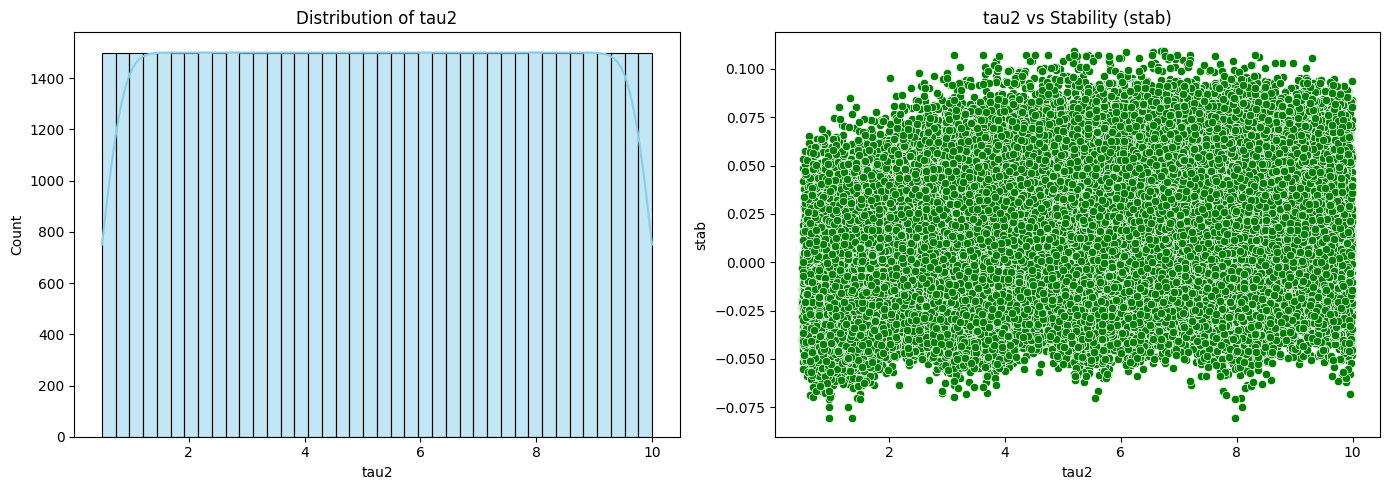

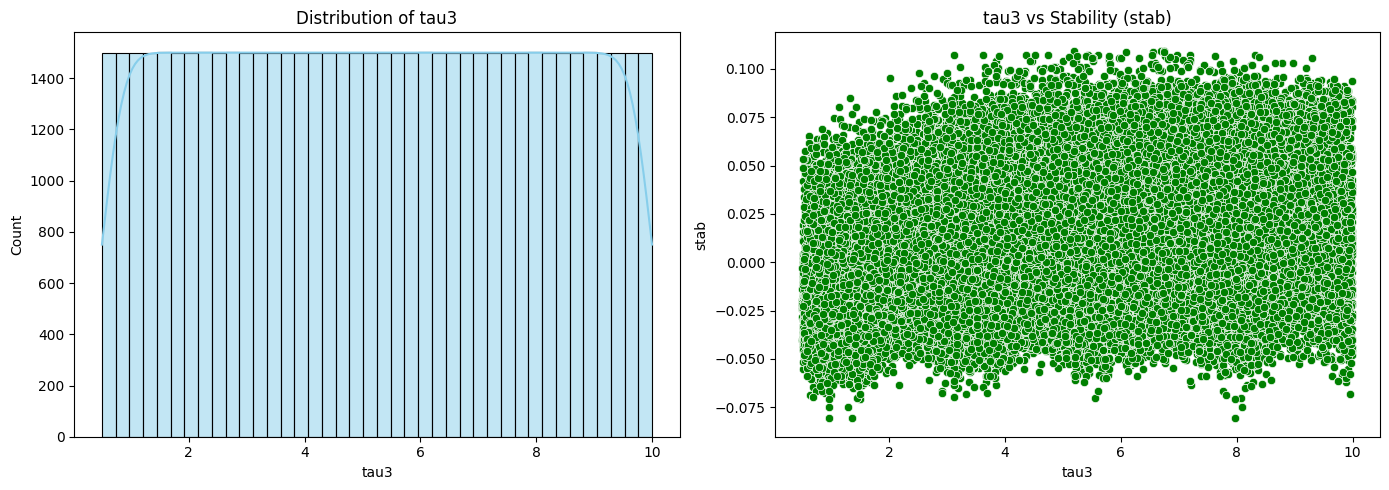

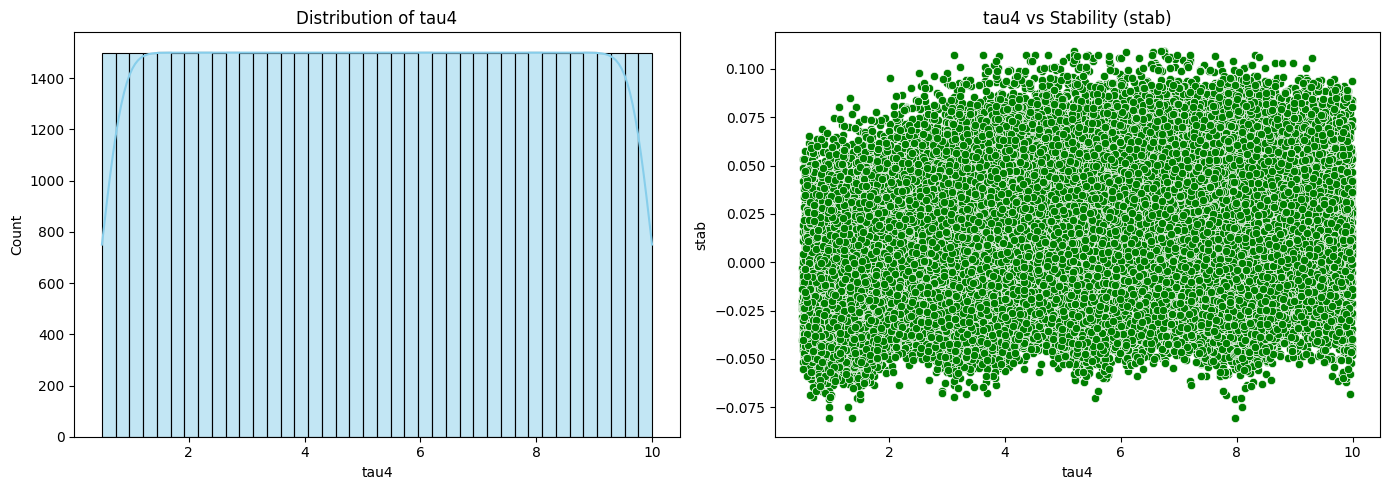

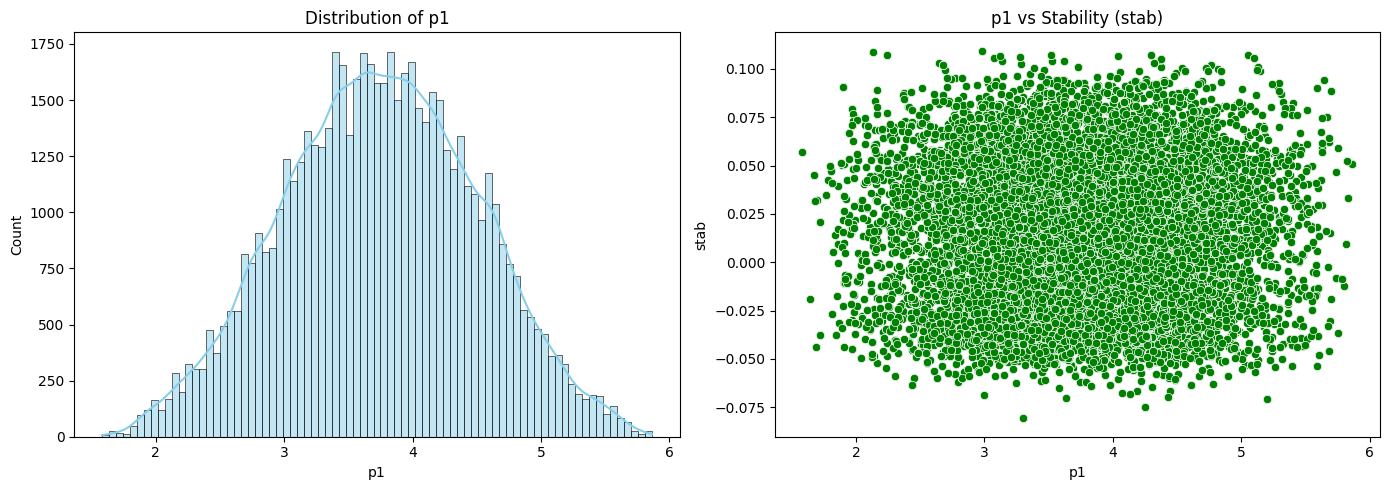

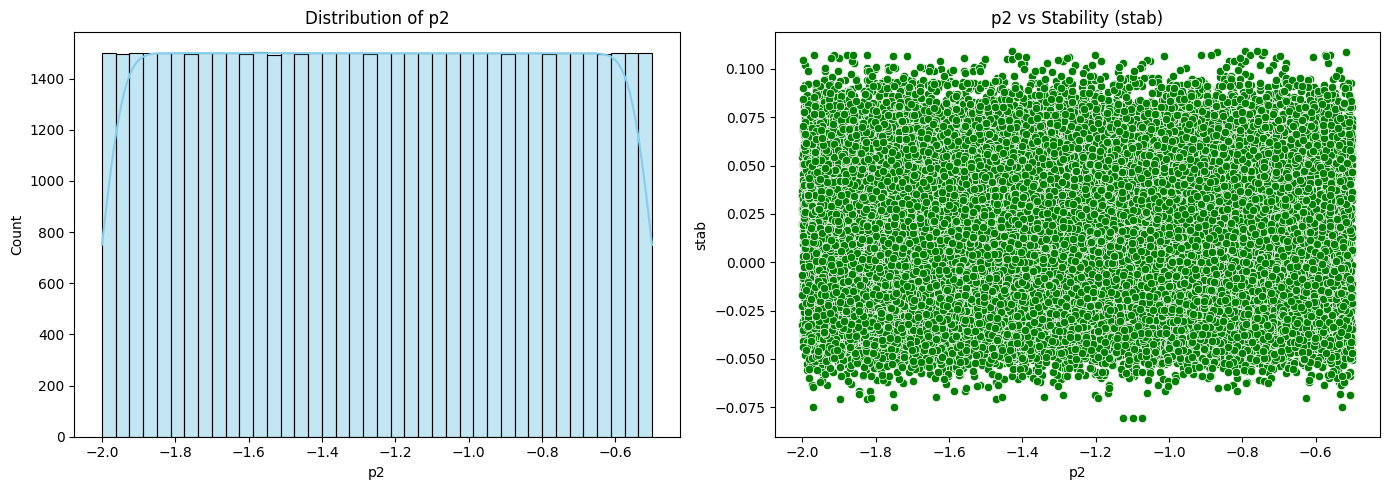

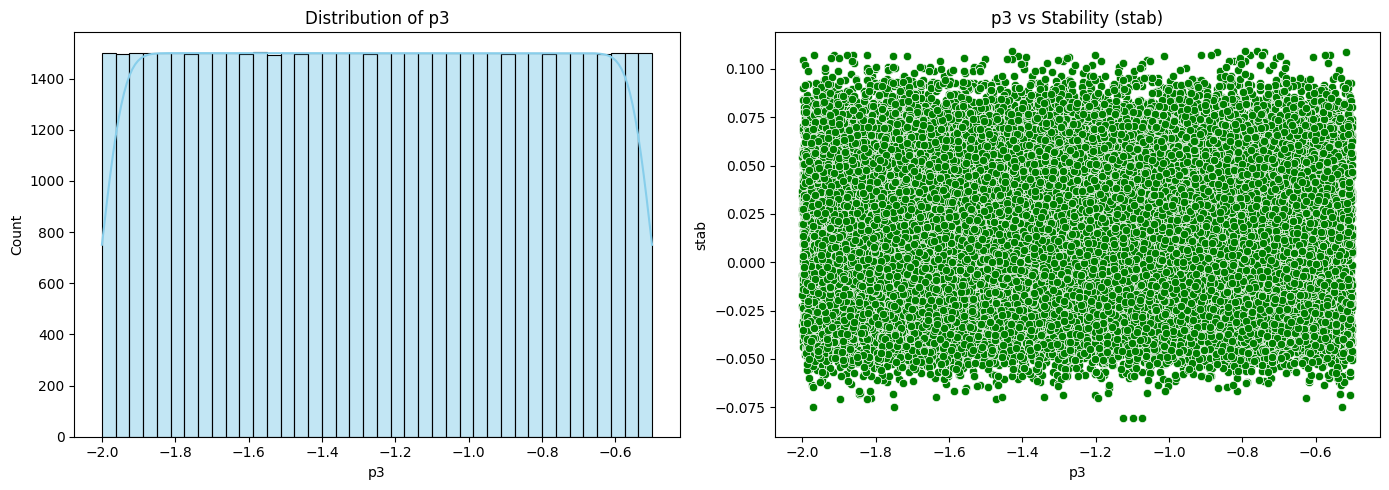

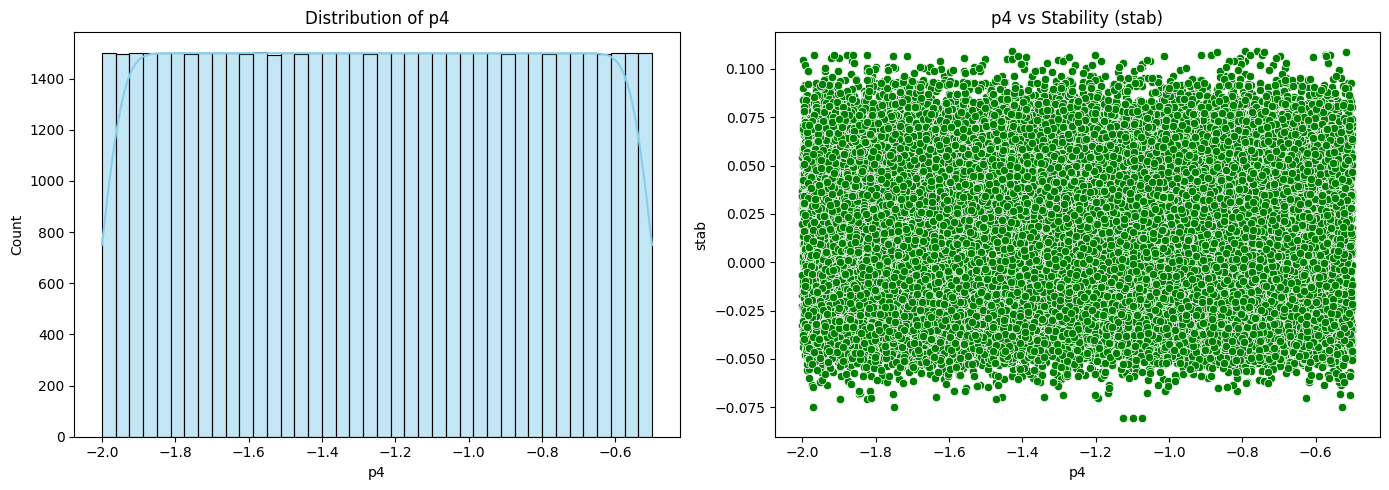

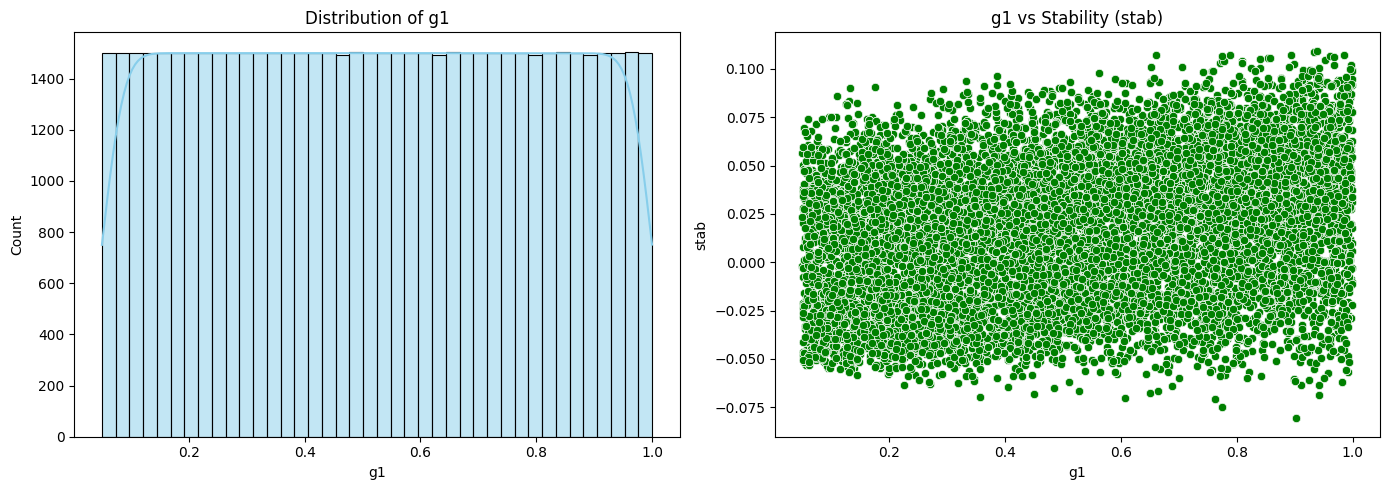

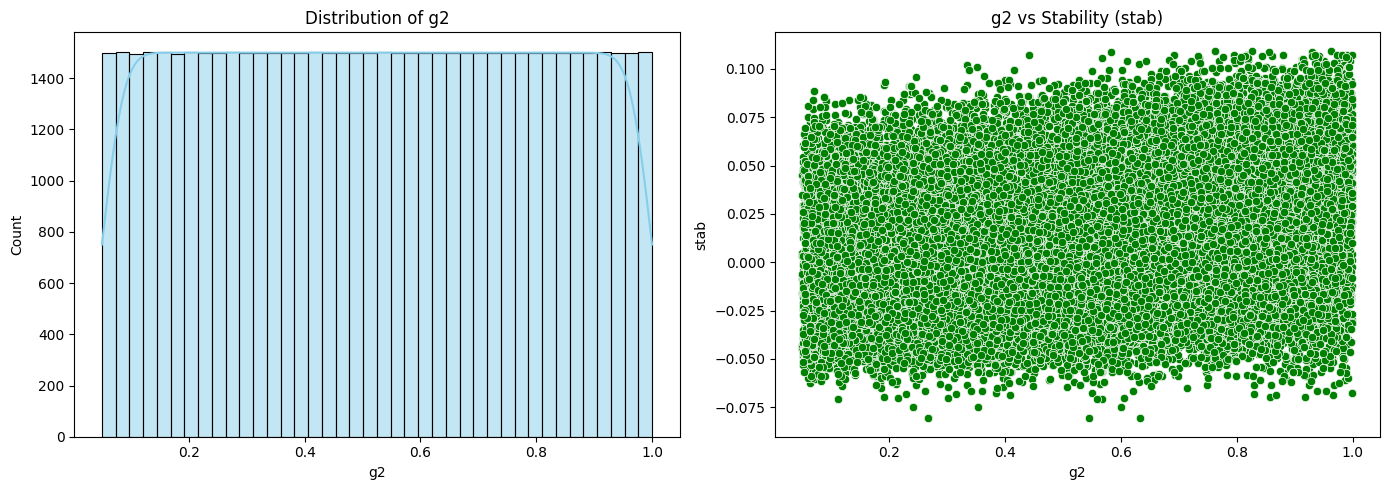

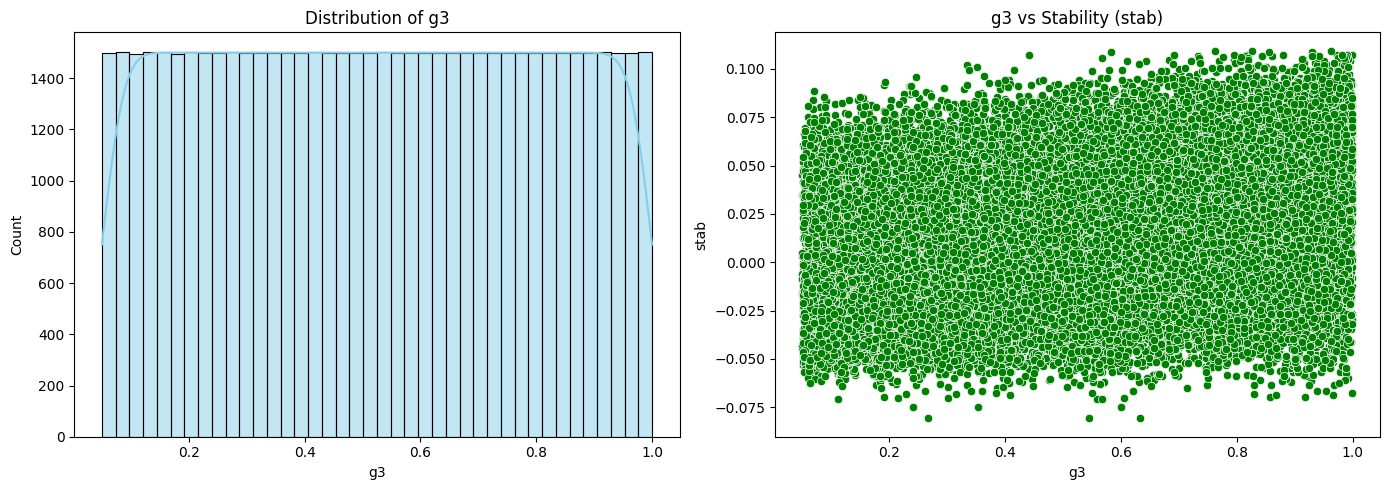

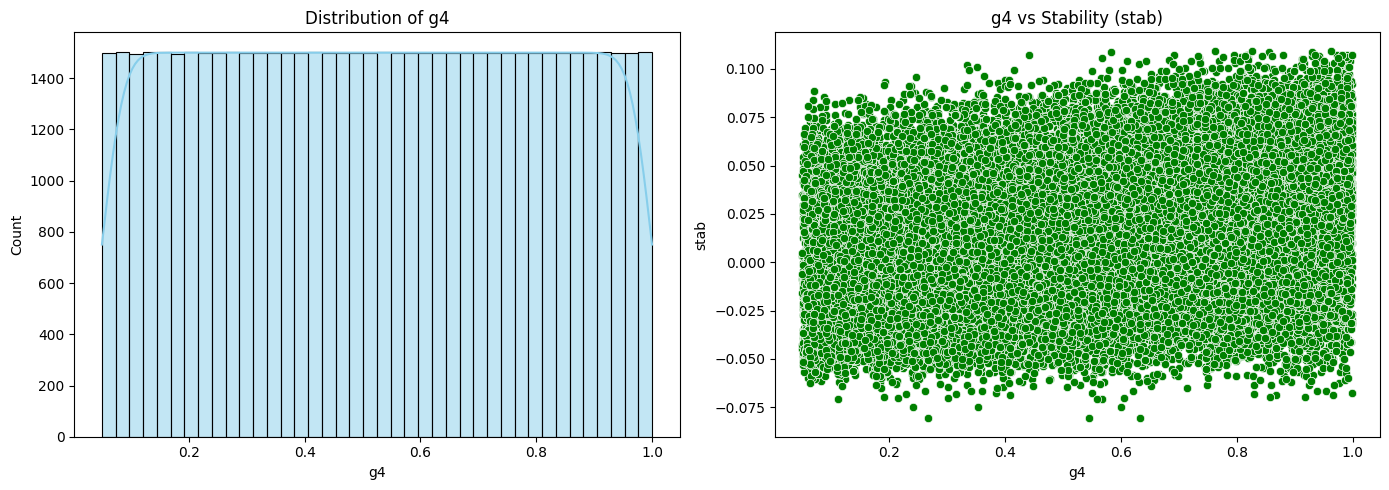

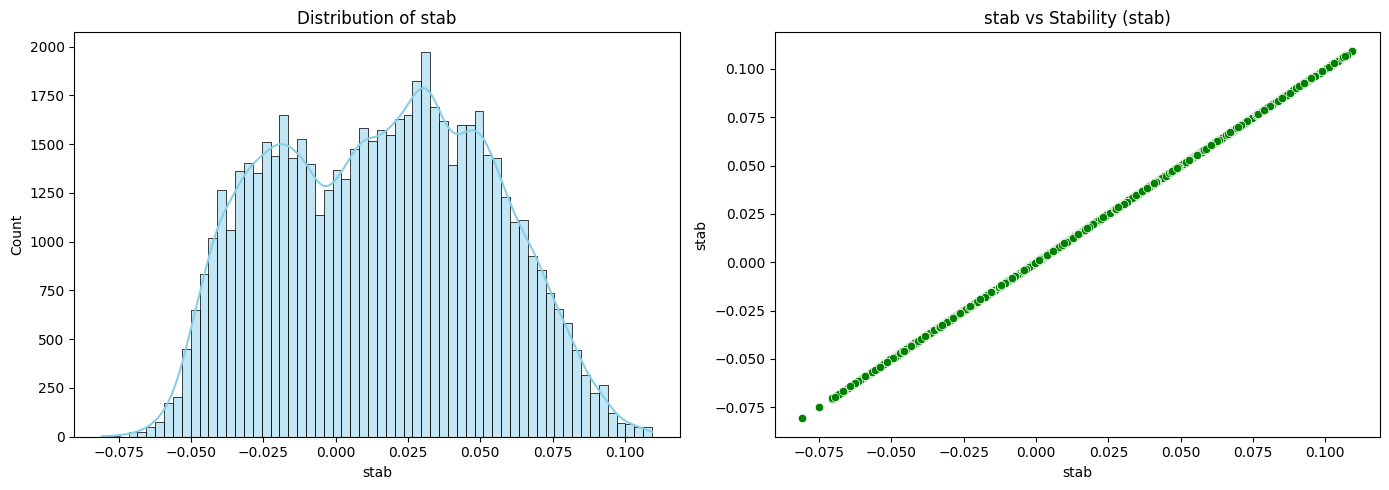

In [11]:
# Distribution of all the data with respect to stability

# Set the color palette
sns.set_palette("Set2")

# Loop through each column in the data (excluding 'stabf' if it exists)
for column in data.columns[:-1]:  # Assuming 'stabf' is the last column
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(data[column], ax=axes[0], color='skyblue', kde=True)
    axes[0].set_title(f'Distribution of {column}')

    # Scatter plot
    sns.scatterplot(x=data[column], y=data['stab'], ax=axes[1], color='green')
    axes[1].set_title(f'{column} vs Stability (stab)')

    # Adjust layout
    plt.tight_layout()
    plt.show()


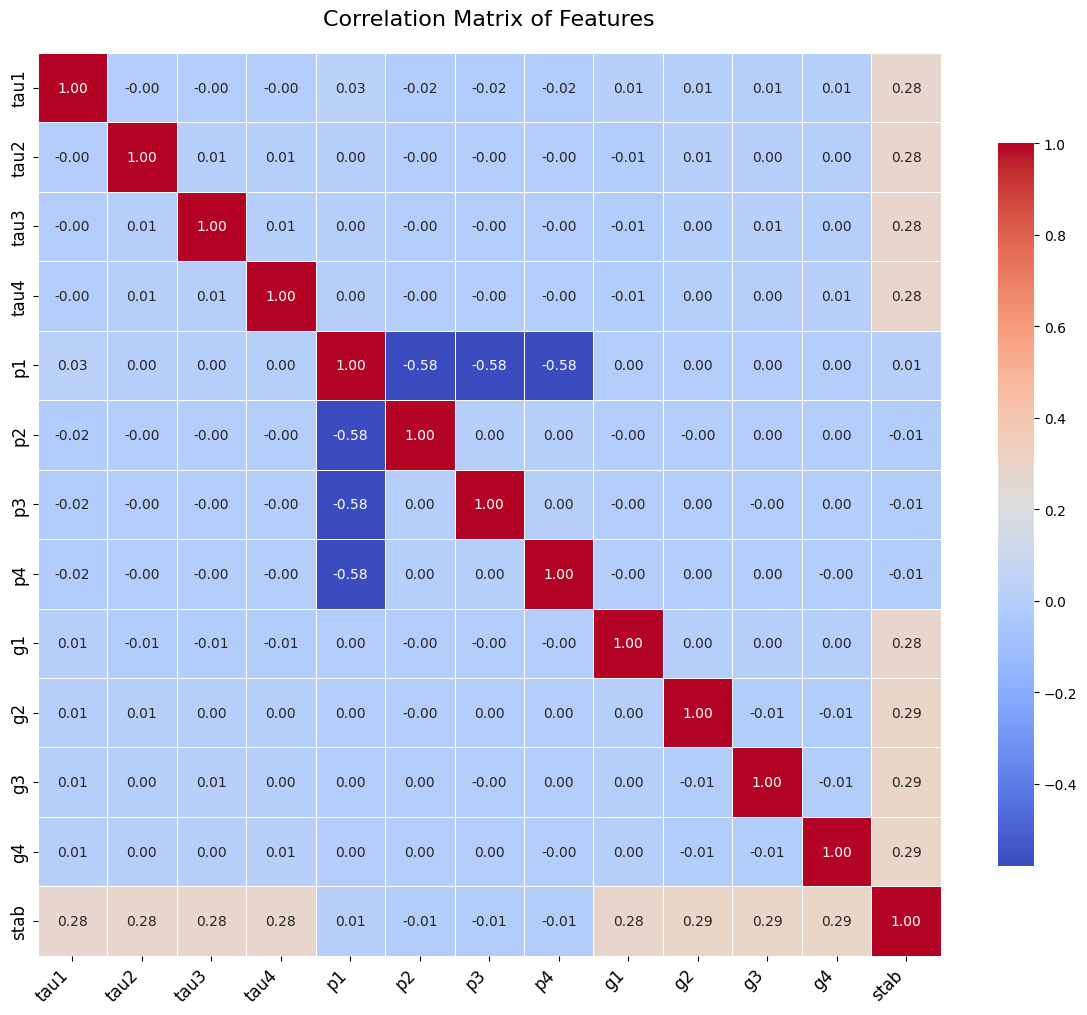

In [12]:
# Compute the correlation matrix excluding 'stabf' if it's the last column
corr_data = data.iloc[:, :-1].corr()

# Create a larger figure for better visibility
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with improved annotations
sns.heatmap(corr_data,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",  # Display correlations with 2 decimal points
            linewidths=0.5,  # Add slight gridlines for separation
            square=True,  # Make heatmap cells square
            cbar_kws={"shrink": 0.8},  # Shrink colorbar slightly
            ax=ax)

# Add titles and labels
ax.set_title('Correlation Matrix of Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

**Correlation with stab:**

- The features tau1, tau2, tau3, and tau4 show a moderate positive correlation with stab (around 0.28). This suggests that the reaction time (tau) is somewhat related to the system's stability.
- g1, g2, g3, and g4 (the price elasticity coefficients) also exhibit a slight positive correlation (around 0.29), indicating a small but noticeable relationship with stability.

**Power-related Features (p1 to p4):**

- There is a strong negative correlation (-0.58) between the supplier power (p1) and the consumer powers (p2, p3, and p4). This makes sense because p1 is the supply power, and it should be equal in magnitude but opposite in sign to the sum of consumer powers.
- The power-related features (p1 to p4) do not show much correlation with stab, suggesting that nominal power values are not significantly influencing system stability.

**Price Elasticity (g1 to g4) Correlation:**

- The price elasticity coefficients (g1, g2, g3, and g4) have low correlations with each other, indicating that each consumer's elasticity behaves somewhat independently of the others.
- These features also show a moderate positive correlation (~0.29) with stab, suggesting that price elasticity might have some role in system stability.

**Overall Trend:**

- Most features do not have a high correlation with one another (other than the expected power relationships), which indicates that the dataset has a diverse range of features with relatively independent behaviors.
- The stab feature has the highest correlation with the reaction time (tau) and price elasticity (g), pointing towards these as key factors influencing the system's stability.

## DATA PREPROCESSING

In [13]:
data['stabf'] = data['stabf'].map({'unstable': 0, 'stable': 1})
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  5.395242  6.758894  2.525003  1.850311  3.513715 -0.847552 -1.648734   
1  6.620098  1.602905  8.616347  3.391141  4.210612 -1.397320 -1.093337   
2  3.441294  3.194950  8.897378  4.052846  3.879996 -0.940282 -1.500366   
3  2.136294  1.273276  2.614373  3.785228  3.628125 -1.241760 -0.973223   
4  7.940691  2.047957  2.544935  4.374240  3.454680 -0.596267 -1.665852   

         p4        g1        g2        g3        g4      stab  stabf  
0 -1.017430  0.902786  0.451621  0.741819  0.684521  0.036920      0  
1 -1.719955  0.564029  0.265844  0.616598  0.796080  0.025449      0  
2 -1.439348  0.941481  0.619960  0.430016  0.886050  0.054770      0  
3 -1.413142  0.272197  0.540088  0.675964  0.540205 -0.029410      1  
4 -1.192560  0.743399  0.236855  0.401875  0.915031  0.026285      0

In [14]:
X, y = data.drop(columns = ['stab', 'stabf']), data['stabf']
X.shape, y.shape

((60000, 12), (60000,))

In [15]:
# Normalization

X_norm = X.copy()

for column in X_norm.columns:
  X_norm[column] = (X_norm[column] - X_norm[column].mean()) / X_norm[column].std()


X_norm.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  0.052961  0.550202 -0.993641 -1.239660 -0.314154  0.929405 -0.920827   
1  0.499592 -1.329874  1.227502 -0.677813  0.612411 -0.340218  0.361794   
2 -0.659526 -0.749352  1.329977 -0.436529  0.172838  0.715255 -0.578190   
3 -1.135380 -1.450069 -0.961053 -0.534114 -0.162040  0.019029  0.639182   
4  0.981133 -1.167591 -0.986373 -0.319337 -0.392646  1.509716 -0.960360   

         p4        g1        g2        g3        g4  
0  0.537093  1.377553 -0.267570  0.790607  0.581677  
1 -1.085303  0.142317 -0.944987  0.334002  0.988465  
2 -0.437276  1.518651  0.346261 -0.346351  1.316531  
3 -0.376756 -0.921818  0.055017  0.550475  0.055441  
4  0.132651  0.796369 -1.050692 -0.448962  1.422206

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 12), (12000, 12), (48000,), (12000,))

## ML Models

### 1. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix:\n", conf_matrix_logreg)

Logistic Regression Accuracy: 82.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      7630
           1       0.78      0.72      0.75      4370

    accuracy                           0.82     12000
   macro avg       0.81      0.80      0.80     12000
weighted avg       0.82      0.82      0.82     12000


Confusion Matrix:
 [[6743  887]
 [1243 3127]]


### 2. Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:\n", conf_matrix_nb)

Naive Bayes Accuracy: 84.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7630
           1       0.85      0.68      0.76      4370

    accuracy                           0.84     12000
   macro avg       0.84      0.81      0.82     12000
weighted avg       0.84      0.84      0.84     12000


Confusion Matrix:
 [[7108  522]
 [1388 2982]]


### 3. Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

SVM Accuracy: 97.83%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7630
           1       0.98      0.96      0.97      4370

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



### 4. Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 95.31%


#### 4.1 RandomizedSearchCV - Random Forest

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid

param_grid = {
    'n_estimators': [100,200,500,1000],
    'max_depth': [10,20,30,40],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['log2', 'sqrt']
}

# Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random_search.best_params_)

# Predict and evaluate
y_pred_rf_random = rf_random_search.predict(X_test)
accuracy_rf_random = accuracy_score(y_test, y_pred_rf_random)
print(f"Random Forest Accuracy with RandomizedSearchCV: {accuracy_rf_random * 100:.2f}%")

Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Random Forest Accuracy with RandomizedSearchCV: 95.81%


### 5. Gradient Bossting Machines (XGBoost)

In [22]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.1 MB/s eta 0:00:00


In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01, random_state = 42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
# Use the 'predict' method instead of calling the object directly
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) # Also ensure you're using the correct predicted values
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

XGBoost Accuracy: 88.38%


#### 5.1 RandomizedSearchCV - XGBoost

In [24]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
                                       n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", xgb_random_search.best_params_)

# Predict and evaluate
y_pred_xgb_random = xgb_random_search.predict(X_test)
accuracy_xgb_random = accuracy_score(y_test, y_pred_xgb_random)
print(f"XGBoost Accuracy after RandomizedSearchCV: {accuracy_xgb_random * 100:.2f}%")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
XGBoost Accuracy after RandomizedSearchCV: 99.06%


### 6. Deep Neural Network

In [25]:
X_train1, y_train1 = X_norm[:42000], y[:42000]
X_val1, y_val1 = X_norm[42000:51000], y[42000:51000]
X_test1, y_test1 = X_norm[51000:], y[51000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((42000, 12), (42000,), (9000, 12), (9000,), (9000, 12), (9000,))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the Sequential model
classifier = Sequential()

# Input layer and first hidden layer with Batch Normalization
classifier.add(Dense(units=128, activation='relu', input_dim=12))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
classifier.add(Dense(units=64, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

# Third hidden layer
classifier.add(Dense(units=32, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

# Output layer for binary classification
classifier.add(Dense(units=1, activation='sigmoid'))

# compile the model
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to stop training if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model summary
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [27]:
# Fit the model with early stopping
history = classifier.fit(X_train1, y_train1,
                         validation_data=(X_val1, y_val1),
                         epochs=100,
                         batch_size=32,
                         callbacks=[early_stopping])

Epoch 1/100
1313/1313 [==============================] - 6s 3ms/step - loss: 0.3520 - accuracy: 0.8390 - val_loss: 0.1681 - val_accuracy: 0.9344
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2454 - accuracy: 0.8949 - val_loss: 0.1327 - val_accuracy: 0.9550
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2223 - accuracy: 0.9050 - val_loss: 0.1151 - val_accuracy: 0.9601
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2067 - accuracy: 0.9127 - val_loss: 0.1109 - val_accuracy: 0.9637
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1965 - accuracy: 0.9181 - val_loss: 0.1071 - val_accuracy: 0.9632
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1907 - accuracy: 0.9199 - val_loss: 0.0976 - val_accuracy: 0.9659
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1850 - accuracy: 0.9233 - val_loss: 0.0954 - val_ac

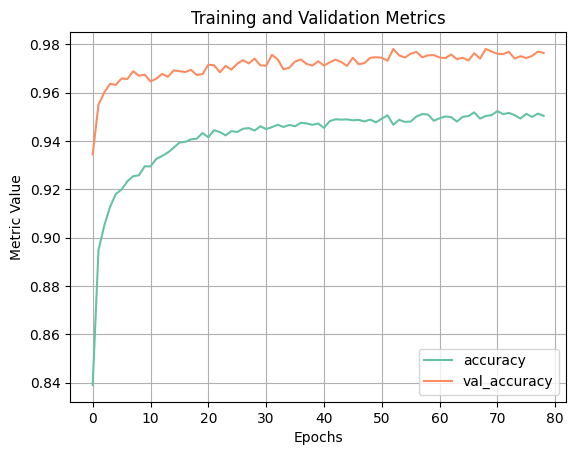

In [28]:
# Convert the history object to a DataFrame
hist_data = pd.DataFrame(history.history)

# Drop the 'loss' and 'val_loss' columns
hist_data.drop(columns=['loss', 'val_loss'], inplace=True)

# Plot the remaining metrics (e.g., 'accuracy' and 'val_accuracy')
hist_data.plot()

# Show the plot
plt.title("Training and Validation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.grid(True)
plt.show()

In [29]:
# Initialize variables to store the best results
best_threshold = 0
best_accuracy = 0
best_cm = None

# Make predictions on the test set (as probabilities)
Y_predicted_prob = classifier.predict(X_test1)

# Loop through different thresholds from 0.1 to 1.0
for threshold in np.arange(0.1, 1.1, 0.1):  # Start at 0.1, increment by 0.1 until 1.0
    # Convert probabilities to binary predictions (0 or 1) using the current threshold
    Y_predicted = (Y_predicted_prob >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test1, Y_predicted)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test1, Y_predicted)

    # If the current accuracy is better than the previous best, update the best results
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_cm = cm

# Print the best results
print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print("Best Confusion Matrix:")
best_cm_df = pd.DataFrame(best_cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(best_cm_df)

282/282 [==============================] - 1s 1ms/step
Best Threshold: 0.5
Best Accuracy: 97.46%
Best Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         5626          117
Actual 1          112         3145


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_models(models_dict, X_test, Y_test):
    """
    This function computes accuracy, precision, recall, F1-score, and confusion matrix for each model.

    Args:
    - models_dict: A dictionary where the key is the model name and the value is the trained model.
    - X_test: Test features.
    - Y_test: True labels for the test set.

    Returns:
    - A pandas DataFrame containing the evaluation metrics for all models.
    """
    # Create lists to store results for each model
    model_names = []
    accuracies = []
    precisions_0 = []
    recalls_0 = []
    f1_scores_0 = []
    precisions_1 = []
    recalls_1 = []
    f1_scores_1 = []
    confusion_matrices = []

    # Iterate over each model and compute the metrics
    for model_name, model in models_dict.items():
        # Get predictions from the model
        Y_predicted = model.predict(X_test)
        Y_predicted = (Y_predicted >= 0.5).astype(int)  # For classifiers like DNN that return probabilities

        # Compute the accuracy
        accuracy = accuracy_score(y_test, Y_predicted)

        # Get classification report as a dictionary
        report = classification_report(y_test, Y_predicted, output_dict=True)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, Y_predicted)

        # Append results to lists
        model_names.append(model_name)
        accuracies.append(accuracy * 100)  # Convert to percentage
        precisions_0.append(report['0']['precision'])
        recalls_0.append(report['0']['recall'])
        f1_scores_0.append(report['0']['f1-score'])
        precisions_1.append(report['1']['precision'])
        recalls_1.append(report['1']['recall'])
        f1_scores_1.append(report['1']['f1-score'])
        confusion_matrices.append(cm)

    # Create a DataFrame to hold the results
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy (%)': accuracies,
        'Precision (Class 0)': precisions_0,
        'Recall (Class 0)': recalls_0,
        'F1-Score (Class 0)': f1_scores_0,
        'Precision (Class 1)': precisions_1,
        'Recall (Class 1)': recalls_1,
        'F1-Score (Class 1)': f1_scores_1,
        'Confusion Matrix': confusion_matrices
    })

    return metrics_df

In [33]:
models_dict = {
     'Logistic Regression': logreg,
     'Naive Bayes': nb_classifier,
     'SVM': svm_classifier,
     'Random Forest': rf_random_search,
     'XGBoost': xgb_random_search,
     'Deep Neural Network': classifier }

metrics_df = evaluate_models(models_dict, X_test, y_test)
metrics_df

375/375 [==============================] - 1s 1ms/step


Model  Accuracy (%)  Precision (Class 0)  Recall (Class 0)  \
0  Logistic Regression     82.250000             0.844353          0.883748   
1          Naive Bayes     84.083333             0.836629          0.931586   
2                  SVM     97.833333             0.979818          0.986239   
3        Random Forest     95.808333             0.960817          0.973788   
4              XGBoost     99.058333             0.991629          0.993578   
5  Deep Neural Network     98.241667             0.984839          0.987549   

   F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.863601             0.779023          0.715561   
1            0.881558             0.851027          0.682380   
2            0.983018             0.975694          0.964531   
3            0.967259             0.953129          0.930664   
4            0.992602             0.988749          0.985355   
5            0.986192             0.978156          0.973455   

   F1-Score (Class 1)             Confusion Matrix  
0            0.745945  [[6743, 887], [1243, 3127]]  
1            0.757430  [[7108, 522], [1388, 2982]]  
2            0.970081   [[7525, 105], [155, 4215]]  
3            0.941762   [[7430, 200], [303, 4067]]  
4            0.987049     [[7581, 49], [64, 4306]]  
5            0.975800    [[7535, 95], [116, 4254]]

## **Key Takeaways:**
- **XGBoost** stands out as the best-performing model across all metrics, thanks to its ability to capture complex patterns and handle both precision and recall effectively.
- **Deep Neural Networks** and **SVM** also perform very well, but XGBoost’s lower error rate and better balance make it the top choice.
- Simpler models like Logistic Regression and Naive Bayes show the limits of linear assumptions and simpler decision boundaries for this problem.

In conclusion, XGBoost is the most suitable model for this task due to its superior performance in accuracy, precision, recall, and overall robustness. It efficiently balances the trade-offs between underfitting and overfitting, making it highly adaptable to complex datasets.

#### Confusion Matrix Heatmap

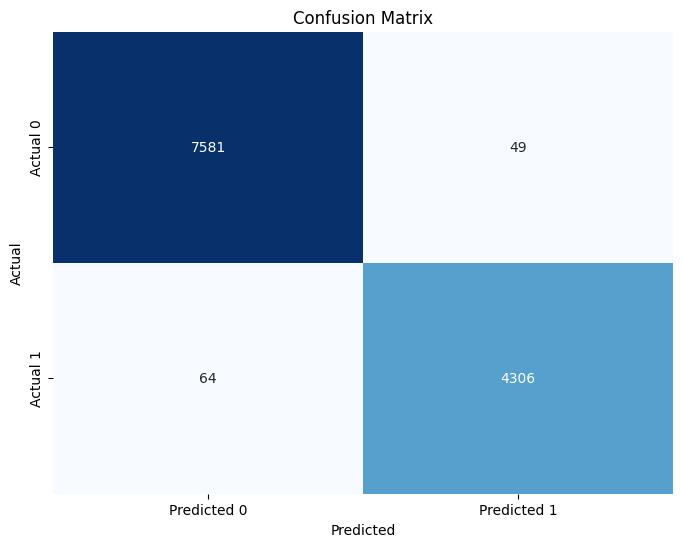

In [36]:
y_predicted = xgb_random_search.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

# Plotting confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve ( Receiver Operating Characteristics)

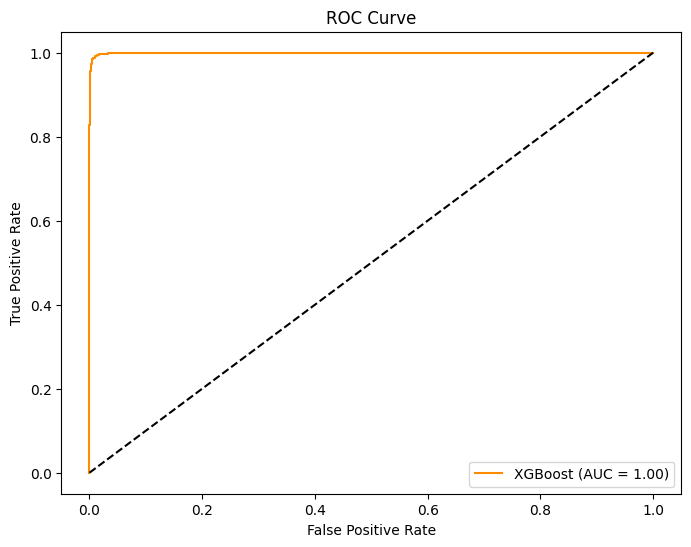

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

y_predicted_prob = xgb_random_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob)
roc_auc = roc_auc_score(y_test, y_predicted_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

#### Precision-Recall Curve

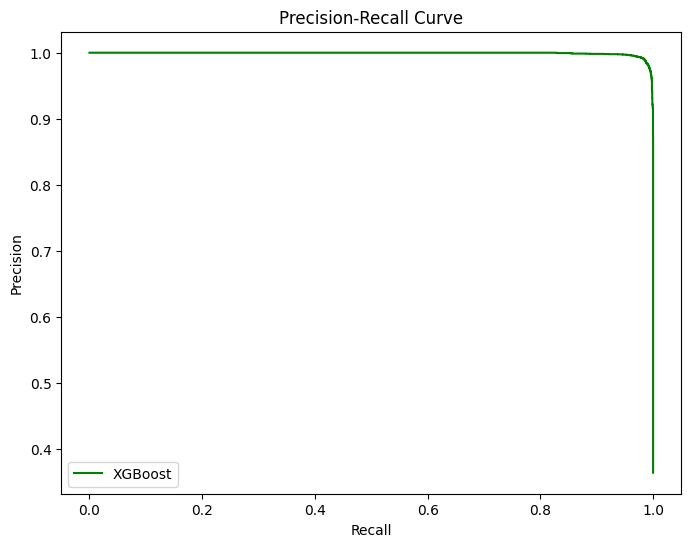

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_predicted_prob)

# Plot precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, label='XGBoost', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()